In [1]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

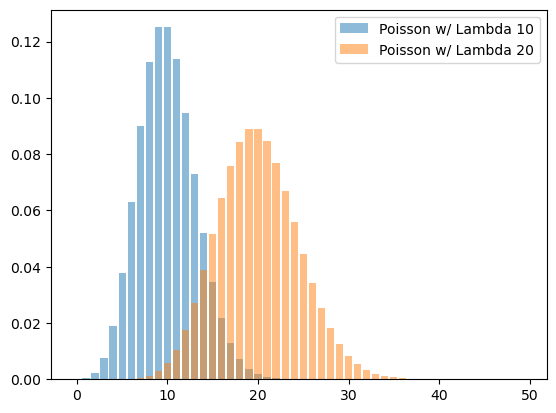

In [10]:
n = 10000
lambda1 = 10
lambda2 = 20

# first group has lambda 10 (X1)
# second group has lambda 20 (X2)

# means in a fixed interval, you would expect to see 10 events
# means in a fixed interval, you would expect to see 20 events

support = np.arange(0,50, dtype=int)
plt.bar(x=support, height = stats.poisson(mu=lambda1).pmf(support), alpha=0.5, label="Poisson w/ Lambda {}".format(lambda1))
plt.bar(x=support, height = stats.poisson(mu=lambda2).pmf(support), alpha=0.5, label="Poisson w/ Lambda {}".format(lambda2))
plt.legend()

In [11]:
# If x = 10 , what is Pr(X1 <= x)
stats.poisson(mu=lambda1).cdf(10)

0.5830397501929852

In [7]:
# sample 1000 points with monte carlo integration to solve this
(stats.poisson(mu=lambda1).rvs(100000) <= 10).mean()

0.58487

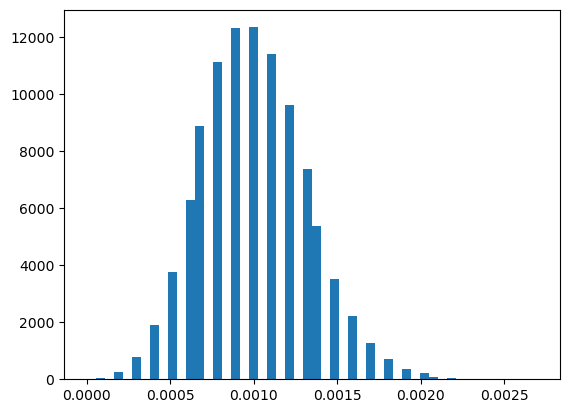

In [22]:
# If n = 100000, and x = 10 (large number of people in the set)
# what's Pr(X1/n <= x/n)
n = 10000
x = 10

plt.hist(stats.poisson(mu=lambda1).rvs(100000)/n, bins=50);

In [ ]:
# Theoretical (Bayesians only have a sample from a distribution)
x= support/n
ymin= 0
ymax = stats.poisson(mu=lambda1).pmf(support)

In [13]:
# What is Pr(X1,X2)?
# Is it Pr(X1)*Pr(X2)? # yes in terms of the clinical trials
# How can you samle from p(X1,X2)
# literally just sample from each and multiply them
# generally if you have samples from p(x1,x2) then do you have samples from p(x1) and p(x2)?
# just look at one of the values while keeping the other constant


In [14]:
# Generate samples for x1 and x2
np.random.seed(42) # For reproducibility
x1_samples = np.random.normal(loc=0, scale=1, size=1000) # x1 ~ N(0, 1)
x2_samples = np.random.normal(loc=5, scale=2, size=1000) # x2 ~ N(5, 2)

# x1_samples are samples from p(x1)
# x2_samples are samples from p(x2)

# If you have a joint sample [(x1, x2), ...], let's simulate that
joint_samples = np.column_stack((x1_samples, x2_samples))

# To get samples from the marginals
marginal_x1_samples = joint_samples[:, 0] # Samples from p(x1)
marginal_x2_samples = joint_samples[:, 1] # Samples from p(x2)

# Now marginal_x1_samples and marginal_x2_samples are your samples from the marginals p(x1) and p(x2)

# assume we can always get samples from the joint

In [25]:
# how about P(x1 < x2)?
stats.poisson(mu=lambda1).rvs(1) < stats.poisson(mu=lambda2).rvs(1) # take a sample


np.mean(stats.poisson(mu=lambda1).rvs(n) < stats.poisson(mu=lambda2).rvs(n)) # average across samples, bunch of True/False


# what is the dsitribution is p(x1 < x2)
# it's a bernoulli distribution with success probbbility 0.98

0.9597

In [20]:
# Joint distribution
np.c_[stats.poisson(mu=lambda1).rvs(n), stats.poisson(mu=lambda2).rvs(n)]

array([[ 5, 19],
       [14, 19],
       [ 7, 23],
       ...,
       [10,  8],
       [11, 23],
       [ 9, 15]], dtype=int64)

0.5259013396729013

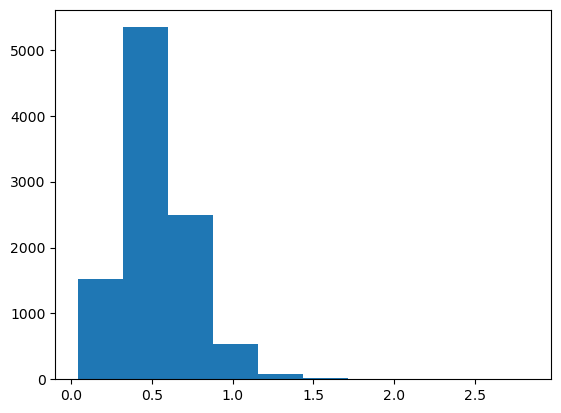

In [23]:
# how about P(x1/x2)?
# what is the distribution of this?

plt.hist(stats.poisson(mu=lambda1).rvs(n) / stats.poisson(mu=lambda2).rvs(n))
np.mean(stats.poisson(mu=lambda1).rvs(n) / stats.poisson(mu=lambda2).rvs(n)) # average across samples, bunch of True/False

In [26]:
# how about P(x1/x2 <= c)
# can you provide an interval for <= 0.95 (np.quantile)
# Pr(a <= x1/x2 <= b) = 0.95 find a and b
# so we want a and b such that P(x1/x2 < a)= 0.025 and P(x1/x2<=b) = 0.975

np.quantile(stats.poisson(mu=lambda1).rvs(n) / stats.poisson(mu=lambda2).rvs(n), [.025, 0.975])

array([0.2       , 1.05555556])

In [27]:
# or
np.percentile(stats.poisson(mu=lambda1).rvs(n) / stats.poisson(mu=lambda2).rvs(n), [2.5, 97.5])

array([0.19354839, 1.        ])

In [ ]:
# as you let the study go longer (increasing T), lambda will increase
# lambda depends on how long the study is running
# gamma is a conjugate prior for the poisson distribution

In [ ]:
# For T factor of 1
# assume x1 = 10 and x2 = 20

support = np.linspace(0,50,1000)

# scale = 1/rate

plt.plot(support, stats.gamma(a = 10 + 1, ))


In [28]:
# Pr( lamda1 < lambda2 given x1_t, x2_t)
# Posterior distribution ! , prior times likelihood

np.c_[stats.gamma(a=10 +1, scale=1).rvs(10000), stats.gamma(a=20+1, scale=1).rvs(10000)]

array([[13.23083643, 13.87238433],
       [ 7.84774264, 22.35721344],
       [ 8.9833553 , 19.07292265],
       ...,
       [11.41056964, 15.40578151],
       [ 6.52868314, 26.00851384],
       [ 9.17646677, 20.92366573]])

In [29]:
np.mean(stats.gamma(a=10+1, scale=1).rvs(10000) < stats.gamma(a=20+1, scale=1).rvs(10000))

0.9636

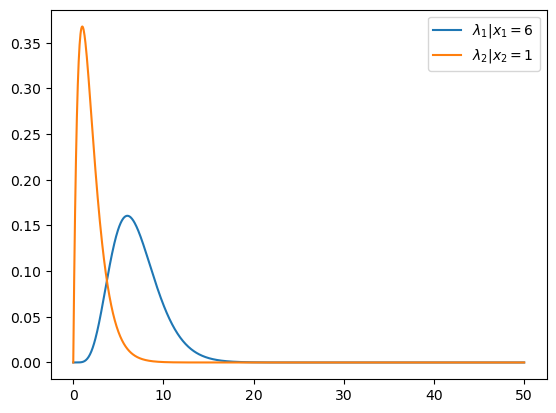

In [36]:
# how about the disribution of the relative (lambda1/lambda2) or absolute (lambda - lambda2)
support = np.linspace(0,50,1000)
# suppose x1=6, x2=1

plt.plot(support, stats.gamma(a=6+1, scale=1).pdf(support), label = "$ \\lambda_1 | x_1 = 6 \\ $")
plt.plot(support, stats.gamma(a=1+1, scale=1).pdf(support), label = "$ \\lambda_2 | x_2 = 1 \\ $")
plt.legend()
